In [1]:
import sympy as sp
import script as rt

In [2]:
from IPython import display

## 01.02.2021-1

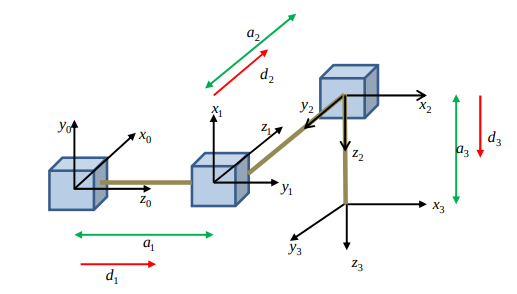

In [3]:
display.Image('images/1.png', width=700)

In [9]:
a1,d1,a2,d2,a3,d3 = sp.symbols('a1,d1,a2,d2,a3,d3')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(sp.pi/2,a1,0,sp.pi/2)
robot.add_prismatic_joint(sp.pi/2,a2,0,-sp.pi/2)
robot.add_prismatic_joint(0,a3,0,0)
robot.interact()

In [10]:
A=robot.get_dh_joint_to_joint(0,3)
A

Matrix([
[0, -1,  0,  a2],
[0,  0, -1, -a3],
[1,  0,  0,  a1],
[0,  0,  0,   1]])

In [11]:
T=robot.get_dh_matrix()
T

Matrix([
[0, -1,  0,  a2],
[0,  0, -1, -a3],
[1,  0,  0,  a1],
[0,  0,  0,   1]])

## 01.02.2021-2

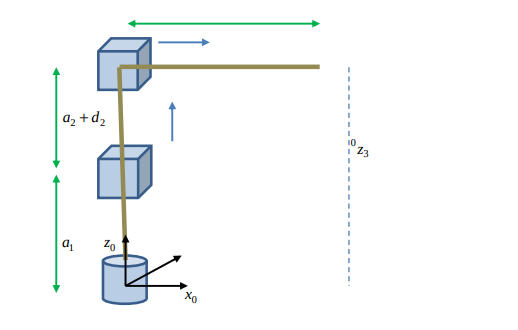

In [19]:
display.Image('images/2.png', width=700)

In [18]:
theta1,a1,a2,a3= sp.symbols('theta1,a1,a2,a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,0)
robot.add_prismatic_joint(0,a2,0,-sp.pi/2)
robot.add_prismatic_joint(0,a3,0,0)
robot.add_subs([(a1,1)])
robot.interact()

In [27]:
A=robot.get_dh_matrix()
A

Matrix([
[cos(theta1),  0, -sin(theta1), -a3*sin(theta1)],
[sin(theta1),  0,  cos(theta1),  a3*cos(theta1)],
[          0, -1,            0,         a1 + a2],
[          0,  0,            0,               1]])

In [31]:
xe,ye,ze=A[:3,3]

In [32]:
x, y, z, s1, c1, a2, a3 = sp.symbols('x, y, z, s1, c1, a2, a3')
subs = [(sp.sin(theta1), s1), (sp.cos(theta1), c1)]
xe, ye, ze = [eq.subs(subs) for eq in [xe, ye, ze]]

In [33]:
xe

-a3*s1

In [34]:
equations = [
    xe - x,
    ye - y,
    ze - z,
    s1**2 + c1**2 - 1
]
solutions = sp.nonlinsolve(equations, [s1, c1, a2, a3])
solutions

{(-x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2), -a1 + z, sqrt(x**2 + y**2)), (x/sqrt(x**2 + y**2), -y/sqrt(x**2 + y**2), -a1 + z, -sqrt(x**2 + y**2))}

In [35]:
xn, yn, zn = -1, -2.5, 2.5
solutions_subs = solutions.subs([(a1, 1), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-0.371390676354104, 0.928476690885259, 1.5, -2.69258240356725), (0.371390676354104, -0.928476690885259, 1.5, 2.69258240356725)}

In [37]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, a2n, a3n = solution
    theta1n = sp.atan2(s1n, c1n)
    q_value = (
        float(theta1n.evalf(30)),
        float(a2n.evalf(30)),
        float(a3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-0.3805063771123649, 1.5, -2.692582403567252)
Решение 2 (2.761086276477428, 1.5, 2.692582403567252)


In [38]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, a2n, a3n = solution
    theta1n = sp.deg(sp.atan2(s1n, c1n))
    q_value = (
        float(theta1n.evalf(30)),
        float(a2n.evalf(30)),
        float(a3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-21.80140948635181, 1.5, -2.692582403567252)
Решение 2 (158.19859051364818, 1.5, 2.692582403567252)


## 03.02.2020-1 i 17.06.2020

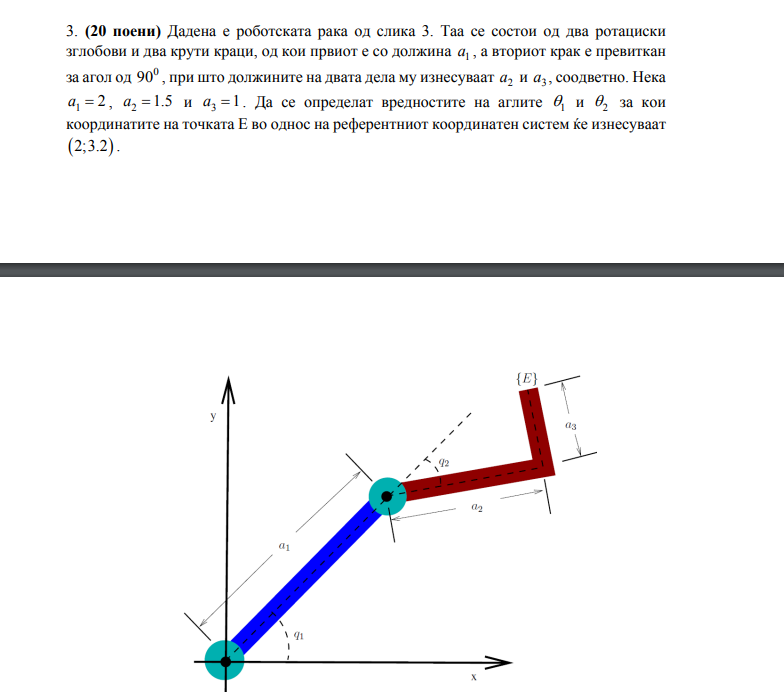

In [5]:
display.Image('images/3.png', width=700)

In [40]:
theta1,theta2,a1,a2,a3= sp.symbols('theta1,theta2,a1,a2,a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,a1,0)
robot.add_revolute_joint(theta2,0,a2,-sp.pi/2)
robot.add_revolute_joint(0,a3,0,0) #mrtov zglob-> ne mrda
robot.add_subs([(a1,1),(a2,1),(a3,1)])
robot.interact()

In [41]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1 + theta2),  0, -sin(theta1 + theta2), a1*cos(theta1) + a2*cos(theta1 + theta2) - a3*sin(theta1 + theta2)],
[sin(theta1 + theta2),  0,  cos(theta1 + theta2), a1*sin(theta1) + a2*sin(theta1 + theta2) + a3*cos(theta1 + theta2)],
[                   0, -1,                     0,                                                                  0],
[                   0,  0,                     0,                                                                  1]])

In [42]:
x, y, z, s1, c1, s12, c12 = sp.symbols('x, y, z, s1, c1, s12, c12') 
equations = [
    a1*c1+a2*c12-a3*s12 - x,
    a1*s1+a2*s12+a3*c12 - y,
    s1**2 + c1**2 - 1,
    s12**2 + c12**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s12, c12])
solutions

{((a1**2*y - a2**2*y - a3**2*y + x**2*y - x*sqrt(-a1**4 + 2*a1**2*a2**2 + 2*a1**2*a3**2 + 2*a1**2*x**2 + 2*a1**2*y**2 - a2**4 - 2*a2**2*a3**2 + 2*a2**2*x**2 + 2*a2**2*y**2 - a3**4 + 2*a3**2*x**2 + 2*a3**2*y**2 - x**4 - 2*x**2*y**2 - y**4) + y**3)/(2*a1*(x**2 + y**2)), (a1**2*x - a2**2*x - a3**2*x + x**3 + x*y**2 + y*sqrt(-a1**4 + 2*a1**2*a2**2 + 2*a1**2*a3**2 + 2*a1**2*x**2 + 2*a1**2*y**2 - a2**4 - 2*a2**2*a3**2 + 2*a2**2*x**2 + 2*a2**2*y**2 - a3**4 + 2*a3**2*x**2 + 2*a3**2*y**2 - x**4 - 2*x**2*y**2 - y**4))/(2*a1*(x**2 + y**2)), (-a1**2*a2*y + a1**2*a3*x + a2**3*y - a2**2*a3*x + a2*a3**2*y + a2*x**2*y + a2*x*sqrt(-a1**4 + 2*a1**2*a2**2 + 2*a1**2*a3**2 + 2*a1**2*x**2 + 2*a1**2*y**2 - a2**4 - 2*a2**2*a3**2 + 2*a2**2*x**2 + 2*a2**2*y**2 - a3**4 + 2*a3**2*x**2 + 2*a3**2*y**2 - x**4 - 2*x**2*y**2 - y**4) + a2*y**3 - a3**3*x - a3*x**3 - a3*x*y**2 + a3*y*sqrt(-a1**4 + 2*a1**2*a2**2 + 2*a1**2*a3**2 + 2*a1**2*x**2 + 2*a1**2*y**2 - a2**4 - 2*a2**2*a3**2 + 2*a2**2*x**2 + 2*a2**2*y**2 - a3**4 + 2

In [43]:
xn, yn, zn = -1, -2.5, 2.5
solutions_subs = solutions.subs([(a1, 1),(a2,1),(a3,1), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-1.07758620689655 - 0.218768578283612*I, -0.431034482758621 + 0.546921445709031*I, -0.426724137931034 + 0.382845011996322*I, -0.995689655172414 - 0.164076433712709*I), (-1.07758620689655 + 0.218768578283612*I, -0.431034482758621 - 0.546921445709031*I, -0.426724137931034 - 0.382845011996322*I, -0.995689655172414 + 0.164076433712709*I)}

In [45]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s12n, c12n = solution
    theta1n = sp.atan2(s1n, c1n)
    theta12n = sp.atan2(s12n, c12n)
    theta2n=theta12n-theta1n
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)) 
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}') #site reshenija se kompleksni

TypeError: Cannot convert complex to float

# prv parcijalen 4ta modicifirana- napravi inverzna kinematika
* За дадена почетна положба $\theta_1 = \theta_3 = 0$ и $d_2 = 5$, да се одреди новата положба на раката

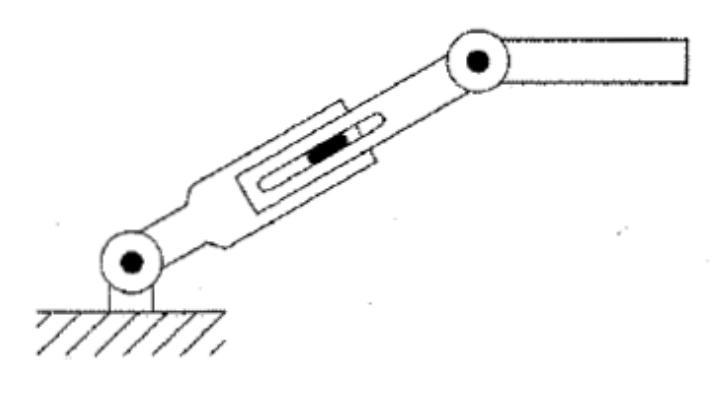

In [3]:
display.Image('images/f4.png', width=450)

In [6]:
theta1, theta3, d2, a3= sp.symbols('theta1, theta3, d2, a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,0,-sp.pi/2)
robot.add_prismatic_joint(0,d2,0,sp.pi/2)
robot.add_revolute_joint(theta3,0,a3,0)
robot.add_subs([(a3,1)])
robot.interact()

In [9]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1 + theta3), -sin(theta1 + theta3), 0, a3*cos(theta1 + theta3) - d2*sin(theta1)],
[sin(theta1 + theta3),  cos(theta1 + theta3), 0, a3*sin(theta1 + theta3) + d2*cos(theta1)],
[                   0,                     0, 1,                                        0],
[                   0,                     0, 0,                                        1]])

In [46]:
# tri nepoznati a dve ravenki vo sistemot -> underactuated robot -> ima pomalku aktuatori, sposobnosti za upravuvanje na zglobovite (kontroleri) od brojot na promenlivi, negovata konfiguracija 

# zadacha direktna kinematika, pa inverzna so dh model

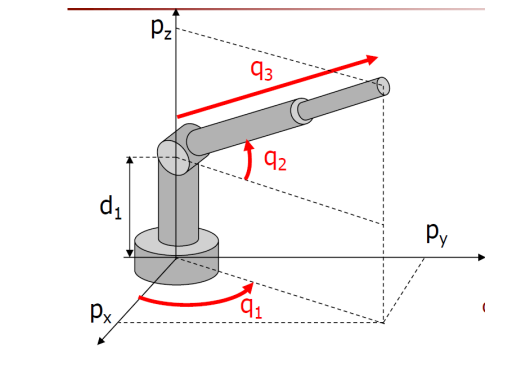

In [21]:
display.Image('images/4.png', width=600)

In [19]:
theta1, d1, theta2, d3= sp.symbols('theta1, d1, theta2, d3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,d1,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,0,sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.add_subs([(d1,1)])
robot.interact()

In [48]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1)*cos(theta2), -sin(theta2)*cos(theta1), -sin(theta1), -d3*sin(theta1)],
[sin(theta1)*cos(theta2), -sin(theta1)*sin(theta2),  cos(theta1),  d3*cos(theta1)],
[           -sin(theta2),             -cos(theta2),            0,              d1],
[                      0,                        0,            0,               1]])

In [49]:
xe,ye,ze=T[:3,3]

In [50]:
ze

d1

In [51]:
x, y, z, s1, c1, d3= sp.symbols('x, y, z, s1, c1, d3')
subs = [(sp.sin(theta1), s1), (sp.cos(theta1), c1)]
xe, ye, ze = [eq.subs(subs) for eq in [xe, ye, ze]]

In [52]:
equations = [
    xe - x,
    ye - y,
    ze - z,
    s1**2 + c1**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, d3])
solutions

EmptySet

tg(theta1)=x/y
theta1= atan2(x/y)
od tuka d3=x/sin(theta1)
za theta2 nema da mozheme da go dobieme ako immame samo x,y i z
ako ja imame cela matrica nz=-sin(theta2) -> theta2= asin(-nz)

rabotniot prostor e dvoesloen cilindar, odnosno dva koncentrichni cilindri eden vo drug, edniot so pomal radius od drugiot

# ispitna1 - 12.02.2012

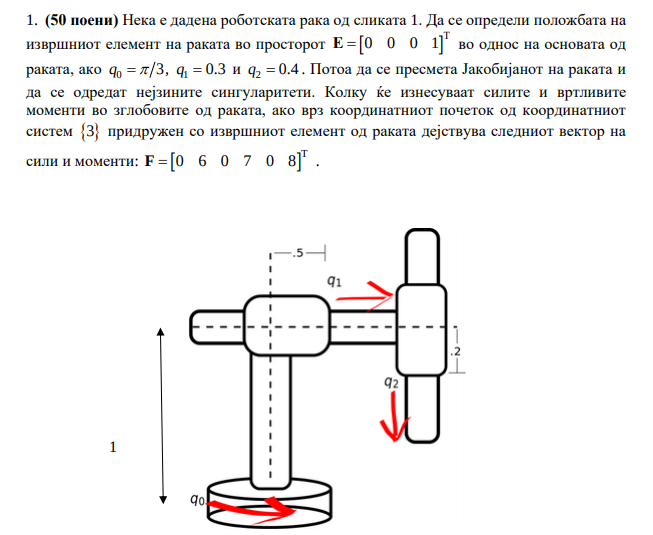

In [32]:
display.Image('images/5.png', width=600)

In [53]:
theta1, d1, theta2, d2, theta3= sp.symbols('theta1, d1, theta2, d2, theta3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,d1,0,-sp.pi/2)
robot.add_revolute_joint(theta2,d2,0,-sp.pi/2)
robot.add_revolute_joint(theta3,0,0,0)
robot.add_subs([(d1,1),(d2,1)])
robot.interact()

In [35]:
T=robot.get_dh_matrix()
T

Matrix([
[sin(theta1)*sin(theta3) + cos(theta1)*cos(theta2)*cos(theta3),  sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2), -sin(theta2)*cos(theta1), -d2*sin(theta1)],
[sin(theta1)*cos(theta2)*cos(theta3) - sin(theta3)*cos(theta1), -sin(theta1)*sin(theta3)*cos(theta2) - cos(theta1)*cos(theta3), -sin(theta1)*sin(theta2),  d2*cos(theta1)],
[                                     -sin(theta2)*cos(theta3),                                        sin(theta2)*sin(theta3),             -cos(theta2),              d1],
[                                                            0,                                                              0,                        0,               1]])

In [ ]:
# izvrsniot element kje bide vo tochkata 
P=[-0.74,
   0.72,
   0.57]

# ispitna2

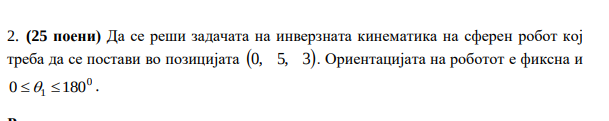

In [3]:
display.Image('images/7.png', width=700)

In [ ]:
# sferen robot znaci translacija po z, rotacija okolu z i rotacija okolu z vo obraten redosled

In [8]:
theta1, theta2, a1, d3= sp.symbols('theta1, theta2, a1, d3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,0,-sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.add_subs([(a1,1)])
robot.interact()

In [9]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1)*cos(theta2), -sin(theta1), -sin(theta2)*cos(theta1), -d3*sin(theta2)*cos(theta1)],
[sin(theta1)*cos(theta2),  cos(theta1), -sin(theta1)*sin(theta2), -d3*sin(theta1)*sin(theta2)],
[            sin(theta2),            0,              cos(theta2),         a1 + d3*cos(theta2)],
[                      0,            0,                        0,                           1]])

In [10]:
xe,ye,ze=T[:3,3]
xe

-d3*sin(theta2)*cos(theta1)

In [11]:
x,y,z,s1,c1,s2,c2,d3=sp.symbols('x,y,z,s1,c1,s2,c2,d3')
subs = [(sp.sin(theta1), s1), (sp.cos(theta1), c1),
        (sp.sin(theta2), s2), (sp.cos(theta2), c2)]
xe, ye, ze = [eq.subs(subs) for eq in [xe, ye, ze]]
equations = [
    xe-x,
    ye-y,
    ze-z,
    s1**2 + c1**2 - 1,
    s2**2 + c2**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s2, c2, d3])
solutions

{(-y*sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2))*sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)/(x**2 + y**2), -x*sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2))*sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)/(x**2 + y**2), -sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2)), (a1 - z)/sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2), -sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)), (-y*sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2))*sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)/(x**2 + y**2), -x*sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2))*sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)/(x**2 + y**2), sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2)), (-a1 + z)/sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2), sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)), (y*sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2))*sqrt(a1**2 - 2*a1*z + x**2 + y**2 + z**2)/(x**2 + y**2), x*sqrt((x**2 + y**2)/(a1**2 - 2*a1*z + x**2 + y**2 + z**2))*sqrt(a1**2 - 2*a1*z + x**2 + y**2 

In [13]:
xn, yn, zn = 1, -2, 5
solutions_subs = solutions.subs([(a1, 1), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-2*sqrt(5)/5, sqrt(5)/5, -sqrt(105)/21, 4*sqrt(21)/21, sqrt(21)), (-2*sqrt(5)/5, sqrt(5)/5, sqrt(105)/21, -4*sqrt(21)/21, -sqrt(21)), (2*sqrt(5)/5, -sqrt(5)/5, -sqrt(105)/21, -4*sqrt(21)/21, -sqrt(21)), (2*sqrt(5)/5, -sqrt(5)/5, sqrt(105)/21, 4*sqrt(21)/21, sqrt(21))}

In [15]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s2n, c2n, d3n = solution
    theta1n = sp.atan2(s1n, c1n)
    theta2n = sp.atan2(s2n, c2n)
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
        float(d3.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-1.1071487177940904, -0.509739678831507, 4.58257569495584)
Решение 2 (2.0344439357957027, 0.509739678831507, 4.58257569495584)
Решение 3 (-1.1071487177940904, 2.6318529747582864, 4.58257569495584)
Решение 4 (2.0344439357957027, -2.6318529747582864, 4.58257569495584)


In [16]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s2n, c2n, d3n = solution
    theta1n = sp.deg(sp.atan2(s1n, c1n))
    theta2n = sp.deg(sp.atan2(s2n, c2n))
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
        float(d3.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-63.43494882292201, -29.205932247399417, 4.58257569495584)
Решение 2 (116.56505117707799, 29.205932247399417, 4.58257569495584)
Решение 3 (-63.43494882292201, 150.7940677526006, 4.58257569495584)
Решение 4 (116.56505117707799, -150.7940677526006, 4.58257569495584)


# ispitna3-25.06.2021

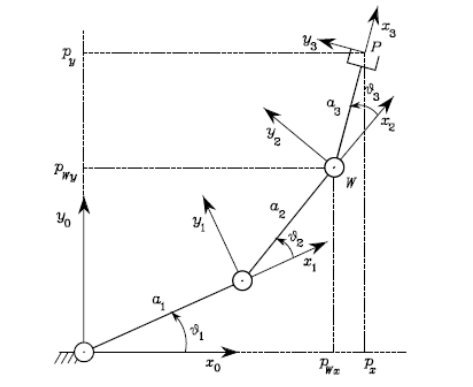

In [6]:
display.Image('images/8.png', width=700)

In [10]:
theta1, theta2, theta3, a1, a2, a3= sp.symbols('theta1, theta2, theta3, a1, a2, a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,a1,0)
robot.add_revolute_joint(theta2,0,a2,0)
robot.add_revolute_joint(theta3,0,a3,0)
robot.add_subs([(a1,1),(a2,1),(a3,1)])
robot.interact()

In [11]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1 + theta2 + theta3), -sin(theta1 + theta2 + theta3), 0, a1*cos(theta1) + a2*cos(theta1 + theta2) + a3*cos(theta1 + theta2 + theta3)],
[sin(theta1 + theta2 + theta3),  cos(theta1 + theta2 + theta3), 0, a1*sin(theta1) + a2*sin(theta1 + theta2) + a3*sin(theta1 + theta2 + theta3)],
[                            0,                              0, 1,                                                                           0],
[                            0,                              0, 0,                                                                           1]])

In [12]:
xe,ye,ze=T[:3,3]
xe

a1*cos(theta1) + a2*cos(theta1 + theta2) + a3*cos(theta1 + theta2 + theta3)

In [13]:
x, y, z = sp.symbols('x, y, z') # tri promenlivi dve razvenki
s1, c1, s12, c12, s123, c123 = sp.symbols('s1, c1, s12, c12, s123, c123')
equations = [
    a1*c1+a2*c12+a3*c123 - x,
    a1*s1+a2*s12+a3*s123 - y,
    s1**2 + c1**2 - 1,
    s12**2 + c12**2 - 1,
    s123**2 + c123**2 -1
]
solutions = sp.nonlinsolve(equations, [s1, c1, s12, c12, s123, c123])
solutions

KeyboardInterrupt: 

In [ ]:
solutions_subs = solutions.subs([(x, 0.7), (y, 1.2), (a1, 1), (a2, 1), (a3,1)])
solutions_subs

In [ ]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s12n, c12n, s123, c123 = solution
    theta1n = sp.atan2(s1n, c1n)
    theta12n = sp.atan2(s12n, c12n)
    theta2n = theta12n - theta1
    theta123n = sp.atan2(s123,c123)
    theta3n = theta123n - theta1n - theta2n
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
        float(theta3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

# ispitni-17.06.2020

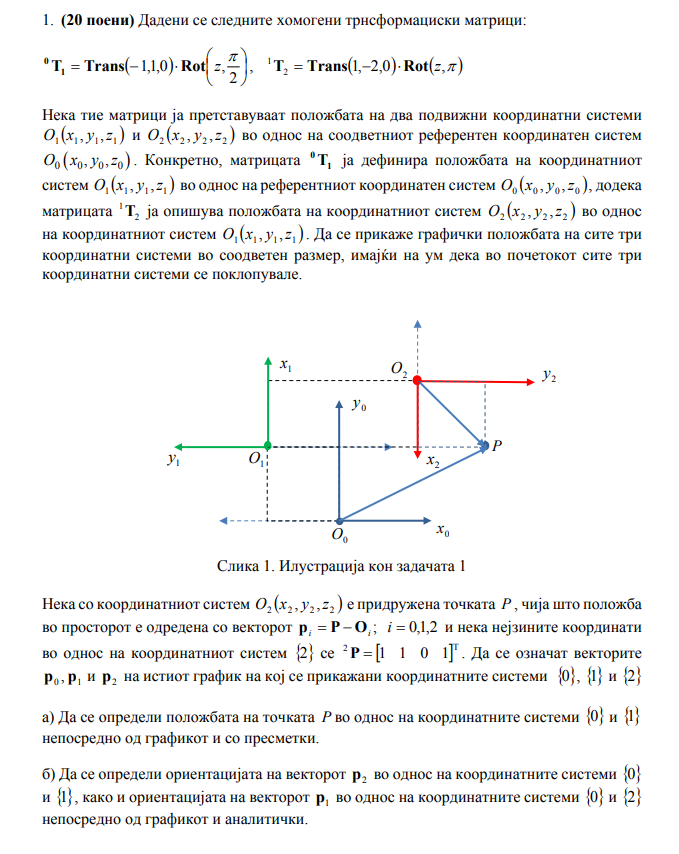

In [14]:
display.Image('images/9.png', width=700)

In [15]:
T1=rt.htranslation3(x=-1,y=1)
T2=rt.hrotation3('z',sp.pi/2)
T01=T1*T2
T01

Matrix([
[0, -1, 0, -1],
[1,  0, 0,  1],
[0,  0, 1,  0],
[0,  0, 0,  1]])

In [16]:
T1=rt.htranslation3(x=1,y=-2)
T2=rt.hrotation3('z',sp.pi)
T12=T1*T2
T12

Matrix([
[-1,  0, 0,  1],
[ 0, -1, 0, -2],
[ 0,  0, 1,  0],
[ 0,  0, 0,  1]])

In [20]:
P12=rt.hpoint3(1,1,0)
P12
# ova e krajnata polozhba na tochkata p  P12=T12*P01 -> P01=inv(T12)*P12

Matrix([
[1],
[1],
[0],
[1]])

In [23]:
# -> P01=inv(T12)*P12
P01=T12.inv()*P12
P01

Matrix([
[ 0],
[-3],
[ 0],
[ 1]])

In [24]:
# -> P00=inv(T01)*P01
P00=T01.inv()*P01
P00

Matrix([
[-4],
[-1],
[ 0],
[ 1]])

In [25]:
# orientacija na vektor?????????????????

# ispitni - 09.04.2019

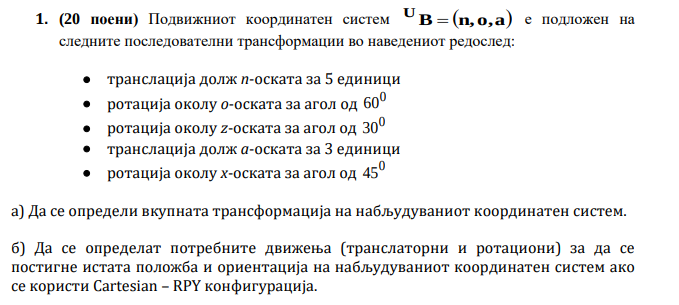

In [26]:
display.Image('images/10.png', width=700)

In [27]:
T1=rt.htranslation3(x=5) #n
T2=rt.hrotation3('o',sp.pi/3)
T3=rt.hrotation3('z',sp.pi/6)
T4=rt.htranslation3(z=3) #a
T5=rt.hrotation3('x',sp.pi/4)
B=T5*T3*T1*T2*T4
B

Matrix([
[             sqrt(3)/4,      -1/2,                    3/4,       9/4 + 5*sqrt(3)/2],
[ sqrt(2)/8 + sqrt(6)/4, sqrt(6)/4, -sqrt(2)/4 + sqrt(6)/8, sqrt(2)/2 + 3*sqrt(6)/8],
[-sqrt(6)/4 + sqrt(2)/8, sqrt(6)/4,  sqrt(6)/8 + sqrt(2)/4, 3*sqrt(6)/8 + 2*sqrt(2)],
[                     0,         0,                      0,                       1]])

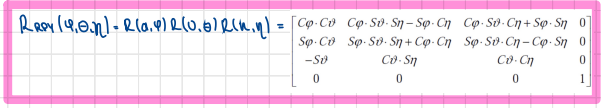

In [29]:
display.Image('images/rpy.png', width=1000)

In [54]:
sin_theta1=B[2,:1]
sin_theta1

Matrix([[-sqrt(6)/4 + sqrt(2)/8]])

In [63]:
sin_theta_1=sin_theta1[0]
sin_theta_1

-sqrt(6)/4 + sqrt(2)/8

In [66]:
theta1=sp.asin(float(-sin_theta_1))
theta1

0.450699999927020

In [67]:
sp.deg(theta1)

81.1259999868636/pi

In [59]:
for_theta2=B[2,1:2]
for_theta2

Matrix([[sqrt(6)/4]])

In [65]:
sin_cos_12=for_theta2[0]
sin_cos_12

TypeError: 'Mul' object is not subscriptable

In [ ]:
sin_theta2=sin_cos_12/sp.cos(theta1)
theta2=sp.asin(sin_theta2)
sp.deg(theta2)

In [68]:
cos_theta13=B[:1,:1]
cos_theta13

Matrix([[sqrt(3)/4]])

In [69]:
cos_theta13[0]

sqrt(3)/4

In [70]:
cos_theta3=cos_theta13/sp.cos(theta1)
cos_theta3

Matrix([[0.277733832284948*sqrt(3)]])

In [71]:
cos_theta3[0]

0.277733832284948*sqrt(3)

In [73]:
theta3=sp.acos(cos_theta3[0])
sp.deg(theta3)

180*acos(0.277733832284948*sqrt(3))/pi

# ispitni 19.04.2019

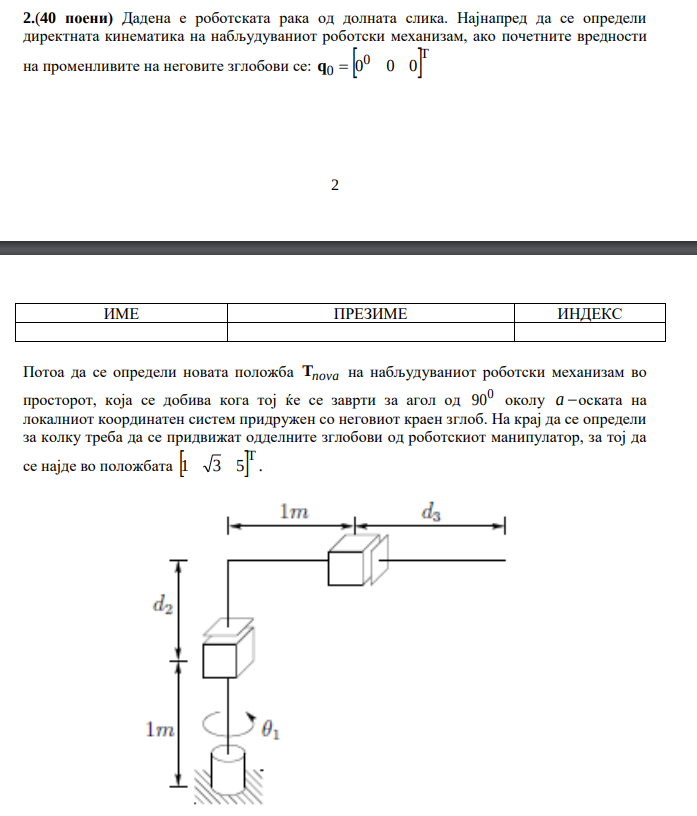

In [74]:
display.Image('images/11.png', width=700)

In [76]:
theta1, d2, d3, a1,a2,a3= sp.symbols('theta1, d2, d3, a1,a2,a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,0)
robot.add_prismatic_joint(0,d2,0,-sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.add_subs([(a1,1)])
robot.interact()

In [77]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta1),  0, -sin(theta1), -d3*sin(theta1)],
[sin(theta1),  0,  cos(theta1),  d3*cos(theta1)],
[          0, -1,            0,         a1 + d2],
[          0,  0,            0,               1]])

In [79]:
Tnov=T*rt.hrotation3('a',sp.pi/2)
Tnov

Matrix([
[ 0, -cos(theta1), -sin(theta1), -d3*sin(theta1)],
[ 0, -sin(theta1),  cos(theta1),  d3*cos(theta1)],
[-1,            0,            0,         a1 + d2],
[ 0,            0,            0,               1]])

In [81]:
P=rt.hpoint3(1, sp.sqrt(3), 5)
P

Matrix([
[      1],
[sqrt(3)],
[      5],
[      1]])

In [83]:
xe,ye,ze=Tnov[:3,3]
xe

-d3*sin(theta1)

In [85]:
x,y,z,s1,c1,d2,d3=sp.symbols('x,y,z,s1,c1,d2,d3')
subs = [(sp.sin(theta1), s1), (sp.cos(theta1), c1)]
xe, ye, ze = [eq.subs(subs) for eq in [xe, ye, ze]]
equations = [
    xe-x,
    ye-y,
    ze-z,
    s1**2 + c1**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, d2, d3])
solutions

{(-x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2), -a1 + z, sqrt(x**2 + y**2)), (x/sqrt(x**2 + y**2), -y/sqrt(x**2 + y**2), -a1 + z, -sqrt(x**2 + y**2))}

In [86]:
xn, yn, zn = 1, sp.sqrt(3), 5
solutions_subs = solutions.subs([(a1, 1), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-1/2, sqrt(3)/2, 4, 2), (1/2, -sqrt(3)/2, 4, -2)}

In [87]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, d2n, d3n = solution
    theta1n = sp.atan2(s1n, c1n)
    q_value = (
        float(theta1n.evalf(30)),
        float(d2n.evalf(30)),
        float(d3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-0.5235987755982989, 4.0, 2.0)
Решение 2 (2.6179938779914944, 4.0, -2.0)


In [88]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, d2n, d3n = solution
    theta1n = sp.deg(sp.atan2(s1n, c1n))
    q_value = (
        float(theta1n.evalf(30)),
        float(d2n.evalf(30)),
        float(d3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-30.0, 4.0, 2.0)
Решение 2 (150.0, 4.0, -2.0)


In [90]:
for q_value in q_values:
    display(Tnov.subs([*zip([theta1, d2, d3], q_value)]).subs([(a1, 1)]))

TypeError: 'module' object is not callable

# ispitna - 14.04.2021

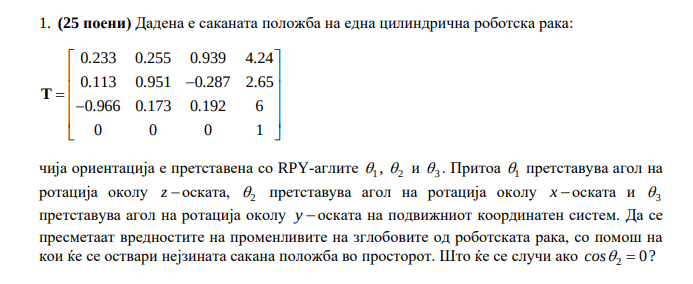

In [4]:
display.Image('images/12.png', width=700)

In [7]:
T = sp.Matrix([
    [0.233, 0.255, 0.939, 4.24],
    [0.113, 0.951, -0.287, 2.65],
    [-0.966, 0.173, 0.192, 6],
    [0, 0, 0, 1],
])
T

Matrix([
[ 0.233, 0.255,  0.939, 4.24],
[ 0.113, 0.951, -0.287, 2.65],
[-0.966, 0.173,  0.192,    6],
[     0,     0,      0,    1]])

In [8]:
eugler_angles=rt.euler_angles(T,'ZXY')
eugler_angles

Matrix([
[-0.261976286859339],
[ 0.173874786487402],
[  1.37459550950678]])

In [10]:
(eugler_angles / sp.pi * 180).evalf()

Matrix([
[-15.0101355695487],
[ 9.96229142946643],
[ 78.7585212323735]])

In [12]:
rt.rotation_matrix_from_euler_angles(eugler_angles, 'ZXY')

Matrix([
[ 0.232238588300546, 0.255084817021134, 0.938614390593637, 0],
[ 0.113402717227219, 0.951316317596463, -0.28659568663919, 0],
[-0.966025393987991,             0.173, 0.192005047252271, 0],
[                 0,                 0,                 0, 1]])

# ispitna 17.09.2018

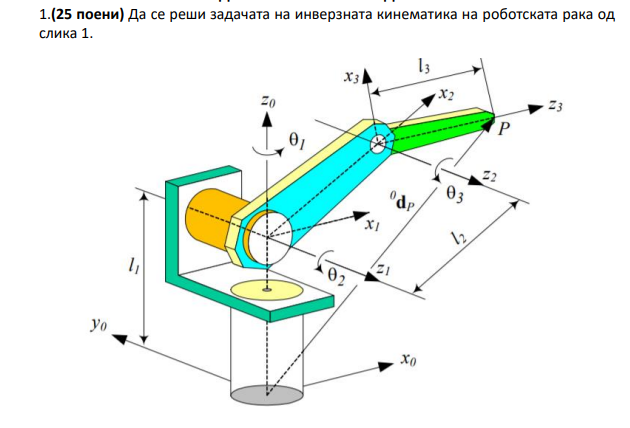

In [6]:
display.Image('images/13.png', width=700)

In [17]:
theta0,theta1,theta2,theta3,a1,a2,a3,l1= sp.symbols('theta0,theta1,theta2,theta3,a1,a2,a3,l1')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta0,a1,0,-sp.pi/2)
robot.add_revolute_joint(theta1,0,a1,0)
robot.add_revolute_joint(theta2,0,a2,sp.pi/2)
robot.add_revolute_joint(theta3,a3,0,0)
robot.add_subs([(a1,1),(a2,1),(a3,1),(l1,1)])
robot.interact()

In [18]:
T=robot.get_dh_matrix()
T

Matrix([
[-sin(theta0)*sin(theta3) + cos(theta0)*cos(theta3)*cos(theta1 + theta2), -sin(theta0)*cos(theta3) - sin(theta3)*cos(theta0)*cos(theta1 + theta2), sin(theta1 + theta2)*cos(theta0), (a1*cos(theta1) + a2*cos(theta1 + theta2) + a3*sin(theta1 + theta2))*cos(theta0)],
[ sin(theta0)*cos(theta3)*cos(theta1 + theta2) + sin(theta3)*cos(theta0), -sin(theta0)*sin(theta3)*cos(theta1 + theta2) + cos(theta0)*cos(theta3), sin(theta0)*sin(theta1 + theta2), (a1*cos(theta1) + a2*cos(theta1 + theta2) + a3*sin(theta1 + theta2))*sin(theta0)],
[                                      -sin(theta1 + theta2)*cos(theta3),                                        sin(theta3)*sin(theta1 + theta2),             cos(theta1 + theta2),         -a1*sin(theta1) + a1 - a2*sin(theta1 + theta2) + a3*cos(theta1 + theta2)],
[                                                                      0,                                                                       0,                                0,                   

In [21]:
x, y, z, s0, c0, s1, c1, s12, c12, d2 = sp.symbols('x, y, z, s0, c0, s1, c1, s12, c12, d2') 
equations = [
    (a1*c1+a2*c12+a3*s12)*c0-x,
    (a1*c1+a2*c12+a3*s12)*s0-y,
    -a1*s1+a1-a2*s12+a3*c12-z,
    s1**2 + c1**2 - 1,
    s12**2 + c12**2 - 1,
    s0**2 + c0**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s12, c12, s0, c0])
solutions

KeyboardInterrupt: 

In [ ]:
xn, yn, zn = 0.7, 0.82, 0
solutions_subs = solutions.subs([(a3, 1), (x, xn), (y, yn), (z, zn)])
solutions_subs

In [ ]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s13n, c13n, d2 = solution
    theta1n = sp.atan2(s1n, c1n)
    theta13n = sp.atan2(s13n, c13n)
    theta3n = theta13n - theta1n
    q_value = (
        float(theta1n.evalf(30)),
        float(d2,evalaf(30)),
        float(theta3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

In [ ]:
for q_value in q_values:
    display(T.subs([*zip([theta1, d2, theta3], q_value)]).subs([(a3, 1)]))

# ispitna 17.09.2018

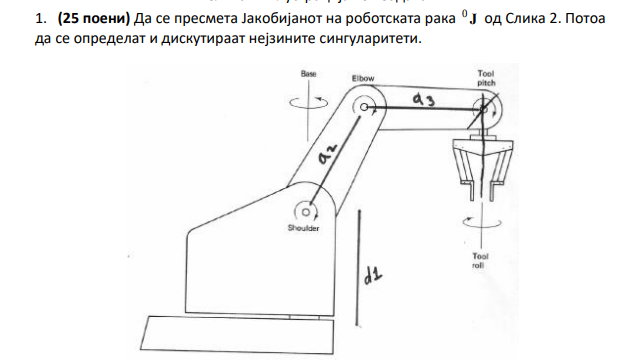

In [22]:
display.Image('images/14.png', width=700)

In [25]:
theta1,theta2,theta3,a1,a2,a3,l1= sp.symbols('theta1,theta2,theta3,a1,a2,a3,l1')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(0,l1,0,sp.pi/2)
robot.add_revolute_joint(theta1,0,a2,0)
robot.add_revolute_joint(theta2,0,a3,sp.pi/2)
robot.add_revolute_joint(theta3,a3,0,0)
robot.add_subs([(a1,1),(a2,1),(a3,1),(l1,1)])
robot.interact()

In [26]:
T=robot.get_dh_matrix()
T

Matrix([
[cos(theta3)*cos(theta1 + theta2), -sin(theta3)*cos(theta1 + theta2),  sin(theta1 + theta2),      a2*cos(theta1) + sqrt(2)*a3*sin(theta1 + theta2 + pi/4)],
[                    -sin(theta3),                      -cos(theta3),                     0,                                                            0],
[sin(theta1 + theta2)*cos(theta3), -sin(theta3)*sin(theta1 + theta2), -cos(theta1 + theta2), a2*sin(theta1) - sqrt(2)*a3*cos(theta1 + theta2 + pi/4) + l1],
[                               0,                                 0,                     0,                                                            1]])

In [27]:
x, y, z, s1, c1, s12, c12, s2, c2 = sp.symbols('x, y, z, s1, c1, s12, c12, s2, c2')  #nigde ne se pojavuva theta3 vo x y z
equations = [
    a2*c1+sp.sqrt(2)*a3*s12-x,
    a2*s1-sp.sqrt(2)*a3*c12+l1-z,
    s1**2 + c1**2 - 1,
    s12**2 + c12**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s12, c12])
solutions

{((-a2**2*l1 + a2**2*z + 2*a3**2*l1 - 2*a3**2*z - l1**3 + 3*l1**2*z - l1*x**2 - 3*l1*z**2 + x**2*z - x*sqrt(-a2**4 + 4*a2**2*a3**2 + 2*a2**2*l1**2 - 4*a2**2*l1*z + 2*a2**2*x**2 + 2*a2**2*z**2 - 4*a3**4 + 4*a3**2*l1**2 - 8*a3**2*l1*z + 4*a3**2*x**2 + 4*a3**2*z**2 - l1**4 + 4*l1**3*z - 2*l1**2*x**2 - 6*l1**2*z**2 + 4*l1*x**2*z + 4*l1*z**3 - x**4 - 2*x**2*z**2 - z**4) + z**3)/(2*a2*(l1**2 - 2*l1*z + x**2 + z**2)), (a2**2*x - 2*a3**2*x + l1**2*x - 2*l1*x*z - l1*sqrt(-a2**4 + 4*a2**2*a3**2 + 2*a2**2*l1**2 - 4*a2**2*l1*z + 2*a2**2*x**2 + 2*a2**2*z**2 - 4*a3**4 + 4*a3**2*l1**2 - 8*a3**2*l1*z + 4*a3**2*x**2 + 4*a3**2*z**2 - l1**4 + 4*l1**3*z - 2*l1**2*x**2 - 6*l1**2*z**2 + 4*l1*x**2*z + 4*l1*z**3 - x**4 - 2*x**2*z**2 - z**4) + x**3 + x*z**2 + z*sqrt(-a2**4 + 4*a2**2*a3**2 + 2*a2**2*l1**2 - 4*a2**2*l1*z + 2*a2**2*x**2 + 2*a2**2*z**2 - 4*a3**4 + 4*a3**2*l1**2 - 8*a3**2*l1*z + 4*a3**2*x**2 + 4*a3**2*z**2 - l1**4 + 4*l1**3*z - 2*l1**2*x**2 - 6*l1**2*z**2 + 4*l1*x**2*z + 4*l1*z**3 - x**4 - 2*x**2*z

In [28]:
xn, yn, zn = 0.7, 0.82, 0
solutions_subs = solutions.subs([(a1, 1),(a2, 1),(a3, 1),(l1, 1), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-0.726222103937939, -0.687460148482771, 0.693730074241385*sqrt(2), 0.13688894803103*sqrt(2)), (0.397363043535255, 0.91766149076465, -0.108830745382325*sqrt(2), 0.698681521767627*sqrt(2))}

In [33]:
q_values = []
for i, solution in enumerate(solutions_subs): 
    s1n, c1n, s12n, c12n = solution
    theta1n = sp.atan2(s1n, c1n)
    theta12n = sp.atan2(s12n, c12n)
    theta2n = theta12n - theta1n-sp.pi/4
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-2.3287822156865934, 2.9193601104005937)
Решение 2 (0.40864149087521723, -1.3485637836056972)


In [34]:
q_values = []
for i, solution in enumerate(solutions_subs): 
    s1n, c1n, s12n, c12n = solution
    theta1n = sp.deg(sp.atan2(s1n, c1n))
    theta12n = sp.deg(sp.atan2(s12n, c12n))
    theta2n = theta12n - theta1n-sp.pi/4
    q_value = (
        float(theta1n.evalf(30)),
        float(theta2n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-133.42939236396637, 211.48161504140265)
Решение 2 (23.413432761083687, -33.05241136819753)


# ispitna net

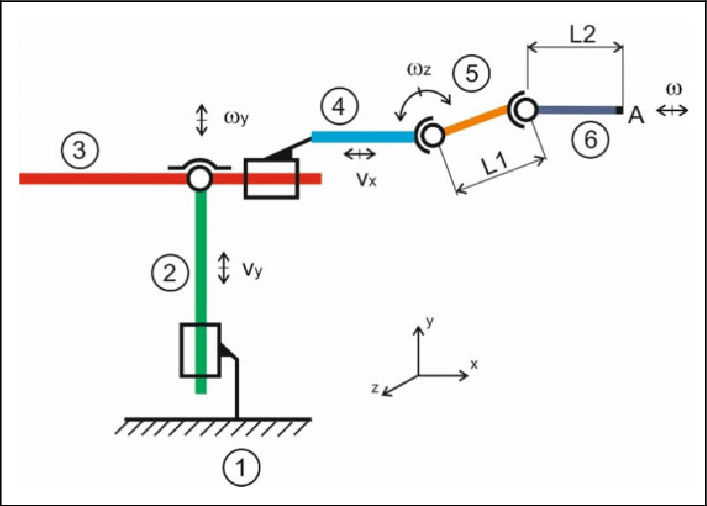

In [3]:
display.Image('images/15.png', width=700)

In [6]:
theta1,theta2,d1,d2,a1,a2,a3= sp.symbols('theta1,theta2,d1,d2,a1,a2,a3')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d1,0,-sp.pi/2)
robot.add_prismatic_joint(-sp.pi/2,d2,0,-sp.pi/2)
robot.add_revolute_joint(theta1,0,a1,0)
robot.add_revolute_joint(theta2,0,a2,0)
robot.add_subs([(a1,1),(a2,1)])
robot.interact()

In [7]:
T = robot.get_dh_matrix()
T

Matrix([
[                    0,                     0, 1,                                              0],
[-sin(theta1 + theta2), -cos(theta1 + theta2), 0, -a1*sin(theta1) - a2*sin(theta1 + theta2) + d2],
[ cos(theta1 + theta2), -sin(theta1 + theta2), 0,  a1*cos(theta1) + a2*cos(theta1 + theta2) + d1],
[                    0,                     0, 0,                                              1]])

In [ ]:
x, y, z, s1, c1, s12, c12, d1, d2 = sp.symbols('x, y, z, s1, c1, s12, c12, d1, d2')  # dve ravenki tri nepoznati-> underactuated robot=pomal broj na aktuatori, kontroleri, vo odnos na negovata konfiguracija( broj na promenlivi)
equations = [
    -a1*s1-a2*s12+d2-y,
    a1*c1+a2*c12+d1-z,
    s1**2 + c1**2 - 1,
    s12**2 + c12**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s12, c12, d1, d2])
solutions

# ispitna net

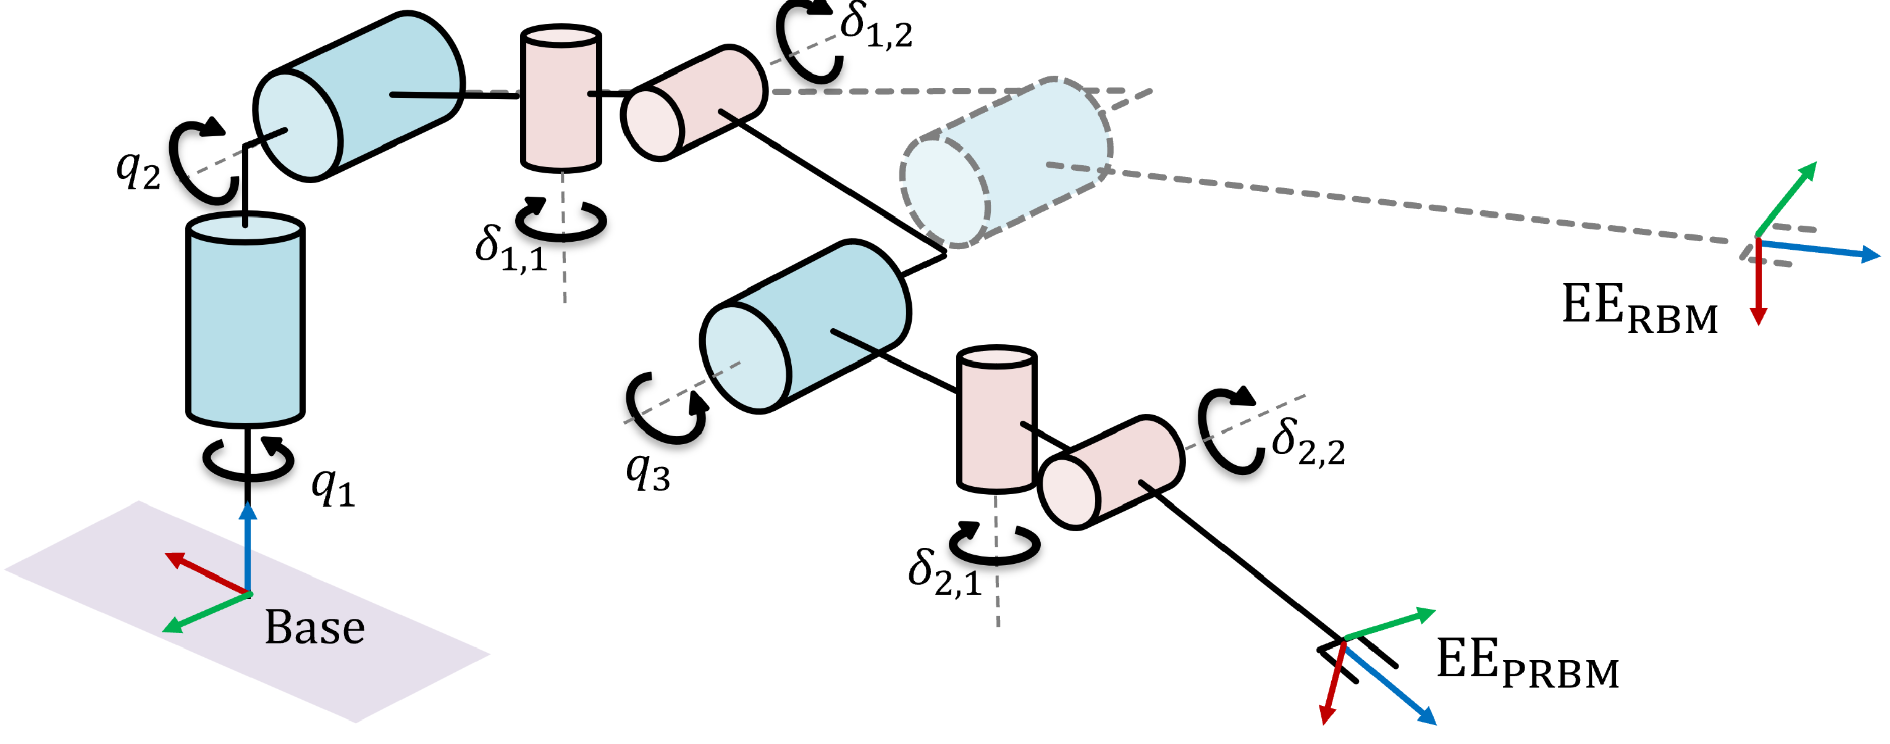

In [10]:
display.Image('images/16.png', width=700)

In [11]:
theta1, theta2, theta3, theta4, theta5, theta6, theta7, a1, a2, a3, a4, a5, a6, a7= sp.symbols('theta1, theta2, theta3, theta4, theta5, theta6, theta7, a1, a2, a3, a4, a5, a6, a7')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,a2,sp.pi/2)
robot.add_revolute_joint(theta3,0,a3,sp.pi/2)
robot.add_revolute_joint(theta4,0,a4,sp.pi)
robot.add_revolute_joint(theta5,0,a5,sp.pi/2)
robot.add_revolute_joint(theta6,0,a6,sp.pi/2)
robot.add_revolute_joint(theta7,0,a7,0)
robot.add_subs([(a1,1),(a2,1),(a3,1),(a4,1),(a5,1),(a6,1),(a7,1)])
robot.interact()

In [12]:
T=robot.get_dh_matrix()
T

Matrix([
[  ((sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2))*sin(theta6) + (sin(theta1)*sin(theta3)*cos(theta4 - theta5) + sin(theta2)*sin(theta4 - theta5)*cos(theta1) + cos(theta1)*cos(theta2)*cos(theta3)*cos(theta4 - theta5))*cos(theta6))*cos(theta7) - (sin(theta1)*sin(theta3)*sin(theta4 - theta5) - sin(theta2)*cos(theta1)*cos(theta4 - theta5) + sin(theta4 - theta5)*cos(theta1)*cos(theta2)*cos(theta3))*sin(theta7), -((sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2))*sin(theta6) + (sin(theta1)*sin(theta3)*cos(theta4 - theta5) + sin(theta2)*sin(theta4 - theta5)*cos(theta1) + cos(theta1)*cos(theta2)*cos(theta3)*cos(theta4 - theta5))*cos(theta6))*sin(theta7) - (sin(theta1)*sin(theta3)*sin(theta4 - theta5) - sin(theta2)*cos(theta1)*cos(theta4 - theta5) + sin(theta4 - theta5)*cos(theta1)*cos(theta2)*cos(theta3))*cos(theta7), -(sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2))*cos(theta6) + (sin(theta1)*sin(theta3)*cos(theta4 - theta5) + sin(theta2

# ispitna net

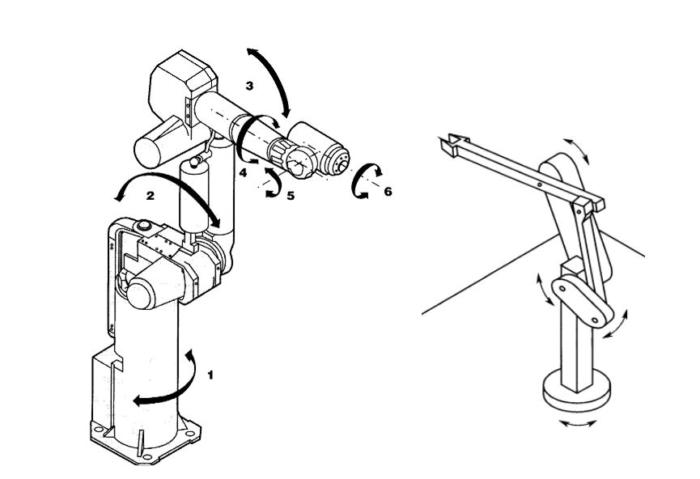

In [14]:
display.Image('images/17.jpg', width=700)

In [15]:
theta1, theta2, theta3, theta4, theta5, theta6, theta7, a1, a2, a3, a4, a5, a6, a7= sp.symbols('theta1, theta2, theta3, theta4, theta5, theta6, theta7, a1, a2, a3, a4, a5, a6, a7')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,a2,0)
robot.add_revolute_joint(theta3,0,a3,sp.pi/2)
robot.add_revolute_joint(theta4,0,a4,-sp.pi/2)
robot.add_revolute_joint(theta5,0,a5,sp.pi/2)
robot.add_revolute_joint(theta6,0,a6,0)
robot.add_subs([(a1,1),(a2,1),(a3,1),(a4,1),(a5,1),(a6,1),(a7,1)])
robot.interact()

In [16]:
T=robot.get_dh_matrix()
T

Matrix([
[((sin(theta1)*sin(theta4) + cos(theta1)*cos(theta4)*cos(theta2 + theta3))*cos(theta5) - sin(theta5)*sin(theta2 + theta3)*cos(theta1))*cos(theta6) + (sin(theta1)*cos(theta4) - sin(theta4)*cos(theta1)*cos(theta2 + theta3))*sin(theta6), (-(sin(theta1)*sin(theta4) + cos(theta1)*cos(theta4)*cos(theta2 + theta3))*cos(theta5) + sin(theta5)*sin(theta2 + theta3)*cos(theta1))*sin(theta6) + (sin(theta1)*cos(theta4) - sin(theta4)*cos(theta1)*cos(theta2 + theta3))*cos(theta6), (sin(theta1)*sin(theta4) + cos(theta1)*cos(theta4)*cos(theta2 + theta3))*sin(theta5) + sin(theta2 + theta3)*cos(theta1)*cos(theta5), a2*cos(theta1)*cos(theta2) - a3*sin(theta2)*sin(theta3)*cos(theta1) + a3*cos(theta1)*cos(theta2)*cos(theta3) + a4*sin(theta1)*sin(theta4) + a4*cos(theta1)*cos(theta4)*cos(theta2 + theta3) + a5*(sin(theta1)*sin(theta4) + cos(theta1)*cos(theta4)*cos(theta2 + theta3))*cos(theta5) - a5*sin(theta5)*sin(theta2 + theta3)*cos(theta1) - a6*(-(sin(theta1)*sin(theta4) + cos(theta1)*cos(theta4)*co

# ispitnna net

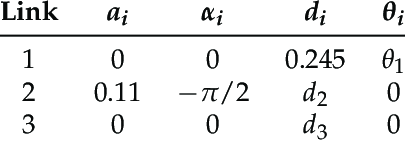

In [19]:
display.Image('images/19.png', width=700)

In [25]:
theta1,a1,a2,a3,d2,d3= sp.symbols('theta1,a1,a2,a3,d2,d3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,0)
robot.add_prismatic_joint(0,d2,a2,-sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.add_subs([(a1,1.245),(a2,1.11)])
robot.interact()

In [26]:
T= robot.get_dh_matrix()
T

Matrix([
[cos(theta1),  0, -sin(theta1), a2*cos(theta1) - d3*sin(theta1)],
[sin(theta1),  0,  cos(theta1), a2*sin(theta1) + d3*cos(theta1)],
[          0, -1,            0,                         a1 + d2],
[          0,  0,            0,                               1]])

In [29]:
xe,ye,ze=T[:3,3]

In [30]:
x, y, z, s1, c1, d2, d3 = sp.symbols('x, y, z, s1, c1, d2, d3')
subs = [(sp.sin(theta1), s1), (sp.cos(theta1), c1)]
xe, ye, ze = [eq.subs(subs) for eq in [xe, ye, ze]]

In [31]:
equations = [
    xe - x,
    ye - y,
    ze - z,
    s1**2 + c1**2 - 1
]
solutions = sp.nonlinsolve(equations, [s1, c1, d2, d3])
solutions

{((a2*y - x*sqrt(-a2**2 + x**2 + y**2))/(x**2 + y**2), (a2*x + y*sqrt(-a2**2 + x**2 + y**2))/(x**2 + y**2), -a1 + z, sqrt(-a2**2 + x**2 + y**2)), ((a2*y + x*sqrt(-a2**2 + x**2 + y**2))/(x**2 + y**2), (a2*x - y*sqrt(-a2**2 + x**2 + y**2))/(x**2 + y**2), -a1 + z, -sqrt(-a2**2 + x**2 + y**2))}

In [32]:
xn, yn, zn = -1, -2.5, 2.5
solutions_subs = solutions.subs([(a1, 1.245), (a2, 1.11), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-0.721122875020397, 0.692807187550993, 1.255, -2.45314084389788), (-0.0443943663589132, -0.999014084102717, 1.255, 2.45314084389788)}

In [33]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, d2n, d3n = solution
    theta1n = sp.atan2(s1n, c1n)
    q_value = (
        float(theta1n.evalf(30)),
        float(d2n.evalf(30)),
        float(d3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-0.8054217160436113, 1.255, -2.4531408438978795)
Решение 2 (-3.097183691770912, 1.255, 2.4531408438978795)


In [36]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, d2n, d3n = solution
    theta1n = sp.deg(sp.atan2(s1n, c1n))
    q_value = (
        float(theta1n.evalf(30)),
        float(d2n.evalf(30)),
        float(d3n.evalf(30)),
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}')

Решение 1 (-46.14726505748315, 1.255, -2.4531408438978795)
Решение 2 (-177.45555391522046, 1.255, 2.4531408438978795)


In [35]:
for q_value in q_values:
    display(T.subs([*zip([theta1, d2, d3], q_value)]).subs([(a1, 1.245), (a2, 1.11)]))

TypeError: 'module' object is not callable

# ispitna net

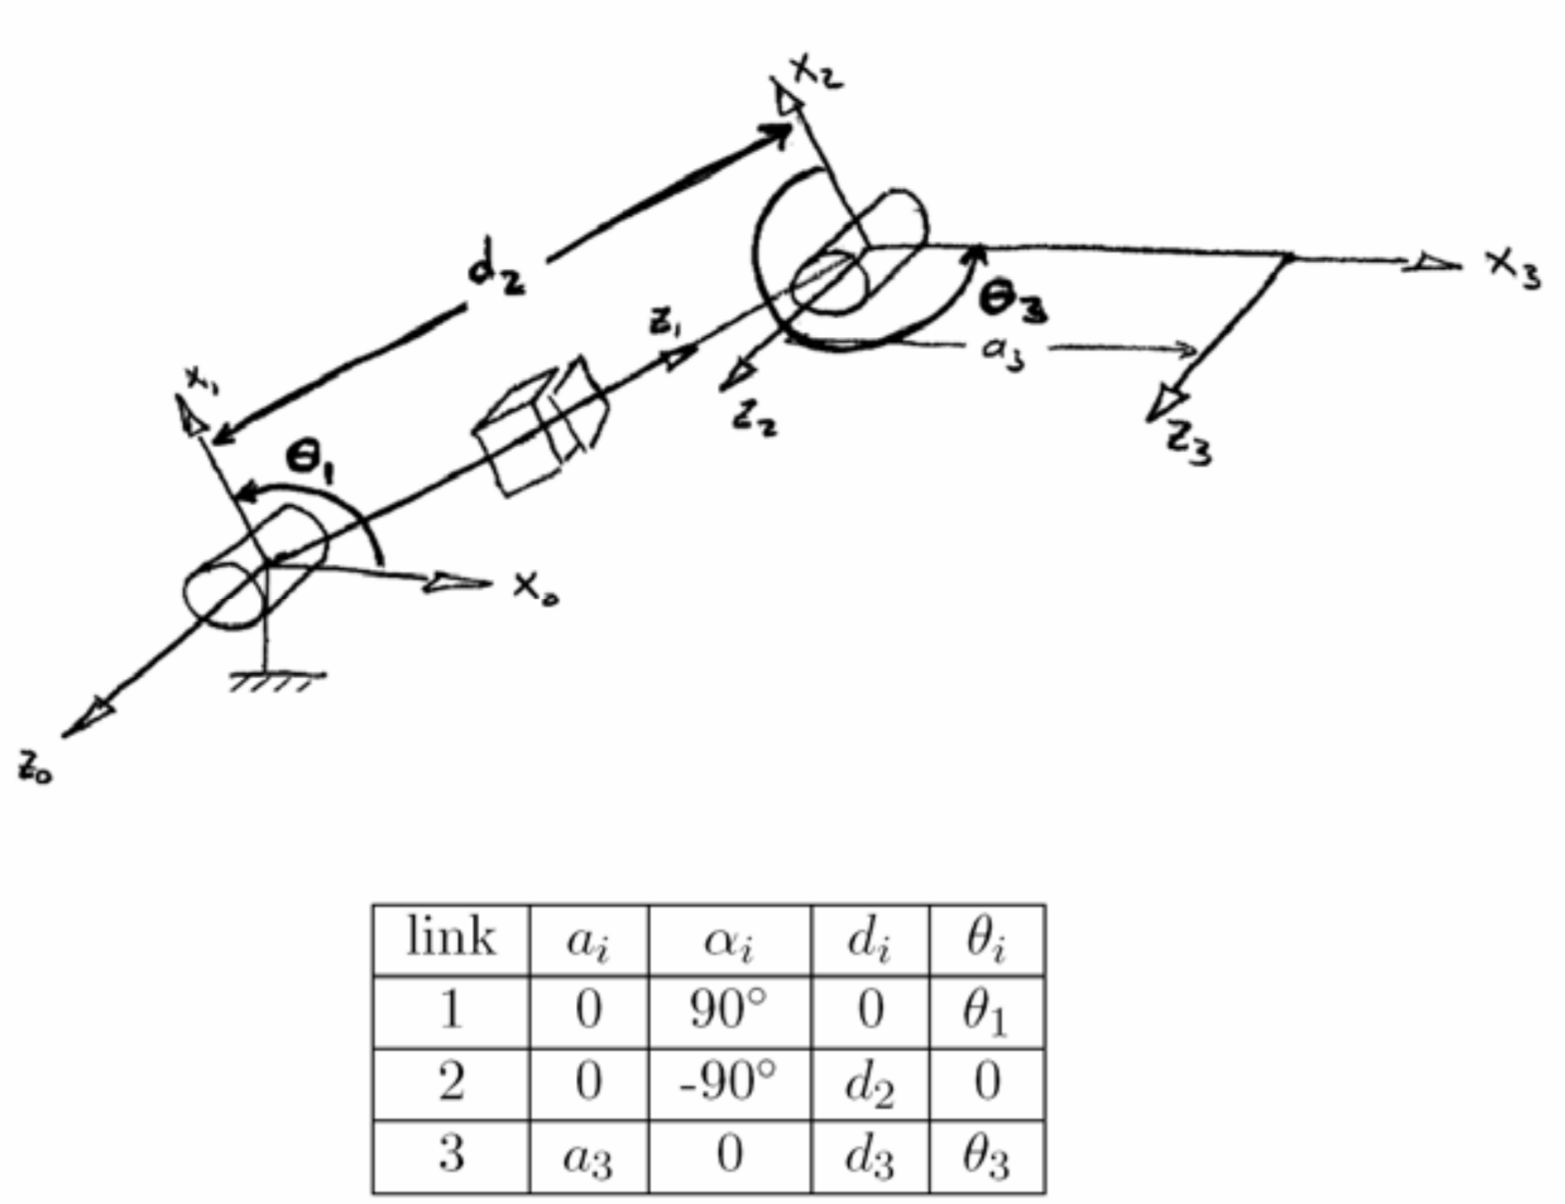

In [3]:
display.Image('images/20.png', width=700)

In [6]:
theta1,theta3,a1,a2,a3,d2= sp.symbols('theta1,theta3,a1,a2,a3,d2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,0,sp.pi/2)
robot.add_prismatic_joint(0,d2,0,-sp.pi/2)
robot.add_revolute_joint(theta3,0,a2,0)
robot.add_subs([(a2,1),(a3,1)])
robot.interact()

In [7]:
T = robot.get_dh_matrix()
T

Matrix([
[cos(theta1 + theta3), -sin(theta1 + theta3), 0, a2*cos(theta1 + theta3) + d2*sin(theta1)],
[sin(theta1 + theta3),  cos(theta1 + theta3), 0, a2*sin(theta1 + theta3) - d2*cos(theta1)],
[                   0,                     0, 1,                                        0],
[                   0,                     0, 0,                                        1]])

In [ ]:
x, y, z, s1, c1, s13, c13, d2 = sp.symbols('x, y, z, s1, c1, s13, c13, d2')  # dve ravenki a tri nepoznati, underactuated robot
equations = [
    a2*c13+d2*s1-x,
    a2*s13-d2*c1-y,
    s1**2 + c1**2 - 1,
    s13**2 + c13**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s12, c12, d1, d2])
solutions

# zbirka 1.33

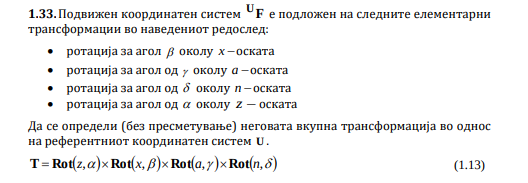

In [3]:
display.Image('images/1,33.png', width=700)

In [4]:
betha, gamma, delta, alpha = sp.symbols('betha, gamma, delta, alpha')
T1=rt.hrotation3('x', betha)
T2=rt.hrotation3('z', gamma) #a
T3=rt.hrotation3('x', delta) #n
T4=rt.hrotation3('z', alpha)
T=T4*T1*T2*T3
T

Matrix([
[-sin(alpha)*sin(gamma)*cos(betha) + cos(alpha)*cos(gamma), (-sin(alpha)*cos(betha)*cos(gamma) - sin(gamma)*cos(alpha))*cos(delta) + sin(alpha)*sin(betha)*sin(delta), -(-sin(alpha)*cos(betha)*cos(gamma) - sin(gamma)*cos(alpha))*sin(delta) + sin(alpha)*sin(betha)*cos(delta), 0],
[ sin(alpha)*cos(gamma) + sin(gamma)*cos(alpha)*cos(betha), (-sin(alpha)*sin(gamma) + cos(alpha)*cos(betha)*cos(gamma))*cos(delta) - sin(betha)*sin(delta)*cos(alpha), -(-sin(alpha)*sin(gamma) + cos(alpha)*cos(betha)*cos(gamma))*sin(delta) - sin(betha)*cos(alpha)*cos(delta), 0],
[                                    sin(betha)*sin(gamma),                                                  sin(betha)*cos(delta)*cos(gamma) + sin(delta)*cos(betha),                                                  -sin(betha)*sin(delta)*cos(gamma) + cos(betha)*cos(delta), 0],
[                                                        0,                                                                                               